# Main code libs

In [ ]:
import requests
import pandas as pd
import numpy as np

## Definition of latitude + longitude

In [ ]:
# Definições de Latitude e Longitude
bottom_left_lat = -25.36
bottom_left_lon = -52.53
upper_right_lat = -19.9
upper_right_lon = -43.24

## Dataset features selected

In [ ]:
# Alguns parametros
parameters = [
    "ALLSKY_SFC_UV_INDEX",
    "T2M",
    "T2MWET",
    "WS10M",
    "WD10M",
    "TS",
    "PS",
    "QV2M",
    "PW",
    "WS50M"
]

In [ ]:
parameters

['ALLSKY_SFC_UV_INDEX',
 'T2M',
 'T2MWET',
 'WS10M',
 'WD10M',
 'TS',
 'PS',
 'QV2M',
 'PW',
 'WS50M']

### Splitting parameters by ','

In [ ]:
','.join(parameters[:10])

'ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M'

Fazendo requisição no servidor da Nasa

In [ ]:
parameters_subset = ','.join(parameters[:10])
url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters={parameters_subset}&community=SB*longitude=-100.9782&latitude=-40.1391@start=20210101&end=20210331&format=CSV"
response = requests.get(url)

In [ ]:
data = response.text
print(data)

{"detail":[{"type":"missing","loc":["query","start"],"msg":"Field required","input":null,"url":"https://errors.pydantic.dev/2.6/v/missing"},{"type":"float_parsing","loc":["query","latitude"],"msg":"Input should be a valid number, unable to parse string as a number","input":"-40.1391@start=20210101","url":"https://errors.pydantic.dev/2.6/v/float_parsing"},{"type":"missing","loc":["query","longitude"],"msg":"Field required","input":null,"url":"https://errors.pydantic.dev/2.6/v/missing"},{"type":"enum","loc":["query","community"],"msg":"Input should be 'ag', 'sb' or 're'","input":"sb*longitude=-100.9782","ctx":{"expected":"'ag', 'sb' or 're'"}}]}


## Parameters for GET Request - Hourly

In [ ]:
# API Parameters for web searching
start = 20200101
end = 20201231
latitude = -23.51
longitude = -47.45
community = 'sb'

In [ ]:
parameters_subset = ','.join(parameters[:])
parameters_subset

'ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M'

In [ ]:
def requisition(start, end, lat, long, com, pars):
  url = f"https://power.larc.nasa.gov/api/temporal/hourly/point?start={start}&end={end}&latitude={lat}&longitude={long}&community={com}&parameters={pars}&format=csv&header=false&time-standard=utc"
  response = requests.get(url)
  data = response.text
  return data

In [ ]:
requisition(start, end, latitude, longitude, community, parameters_subset)

'YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M\n2020,1,1,0,0.0,23.12,21.51,3.92,125.02,22.83,93.04,15.69,2.88,5.66\n2020,1,1,1,0.0,22.45,21.25,3.51,116.74,22.29,93.06,15.81,2.95,4.9\n2020,1,1,2,0.0,22.08,21.05,2.83,105.84,21.92,93.04,15.81,3.03,4.18\n2020,1,1,3,0.0,21.76,20.86,2.1,92.34,21.56,92.99,15.75,3.1,3.65\n2020,1,1,4,0.0,21.48,20.69,1.55,77.22,21.26,92.94,15.69,3.17,3.27\n2020,1,1,5,0.0,21.23,20.53,1.41,62.3,20.96,92.88,15.62,3.24,3.04\n2020,1,1,6,0.0,20.98,20.32,1.4,43.87,20.6,92.84,15.5,3.3,2.89\n2020,1,1,7,0.0,20.86,20.23,1.36,12.6,20.4,92.87,15.38,3.5,2.72\n2020,1,1,8,0.0,21.01,20.34,1.54,349.77,20.81,92.93,15.44,3.69,3.27\n2020,1,1,9,0.25,22.83,21.4,2.6,342.0,23.51,92.99,15.75,3.88,3.4\n2020,1,1,10,1.6,25.6,22.69,3.44,325.08,27.57,93.0,15.56,4.06,4.36\n2020,1,1,11,4.25,28.37,23.86,4.09,314.3,31.31,93.01,15.14,4.23,5.02\n2020,1,1,12,7.8,29.92,24.62,4.18,311.44,32.9,93.01,15.08,4.31,5.06\n2020,1,1,13,10.6,30.05,24.73,4.08,309.88,32.07,93.0,15.2

In [ ]:
# Doing a GET Request to NASA Data source
# url_2 = f"https://power.larc.nasa.gov/api/temporal/hourly/point?start={start}&end={end}&latitude={latitude}&longitude={longitude}&community={community}&parameters=ALLSKY_SFC_UV_INDEX,T2M,WS10M,WD10M,TS,PS,QV2M&format=csv&header=false&time-standard=utc"
# response = requests.get(url_2)

In [ ]:
# Doing a GET Request to NASA Data source
url_3 = f"https://power.larc.nasa.gov/api/temporal/hourly/point?start={start}&end={end}&latitude={latitude}&longitude={longitude}&community={community}&parameters={parameters_subset}&format=csv&header=false&time-standard=utc"
response = requests.get(url_3)

In [ ]:
data = response.text
data

'YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M\n2020,1,1,0,0.0,23.12,21.51,3.92,125.02,22.83,93.04,15.69,2.88,5.66\n2020,1,1,1,0.0,22.45,21.25,3.51,116.74,22.29,93.06,15.81,2.95,4.9\n2020,1,1,2,0.0,22.08,21.05,2.83,105.84,21.92,93.04,15.81,3.03,4.18\n2020,1,1,3,0.0,21.76,20.86,2.1,92.34,21.56,92.99,15.75,3.1,3.65\n2020,1,1,4,0.0,21.48,20.69,1.55,77.22,21.26,92.94,15.69,3.17,3.27\n2020,1,1,5,0.0,21.23,20.53,1.41,62.3,20.96,92.88,15.62,3.24,3.04\n2020,1,1,6,0.0,20.98,20.32,1.4,43.87,20.6,92.84,15.5,3.3,2.89\n2020,1,1,7,0.0,20.86,20.23,1.36,12.6,20.4,92.87,15.38,3.5,2.72\n2020,1,1,8,0.0,21.01,20.34,1.54,349.77,20.81,92.93,15.44,3.69,3.27\n2020,1,1,9,0.25,22.83,21.4,2.6,342.0,23.51,92.99,15.75,3.88,3.4\n2020,1,1,10,1.6,25.6,22.69,3.44,325.08,27.57,93.0,15.56,4.06,4.36\n2020,1,1,11,4.25,28.37,23.86,4.09,314.3,31.31,93.01,15.14,4.23,5.02\n2020,1,1,12,7.8,29.92,24.62,4.18,311.44,32.9,93.01,15.08,4.31,5.06\n2020,1,1,13,10.6,30.05,24.73,4.08,309.88,32.07,93.0,15.2

In [ ]:
data[0:4]

'YEAR'

In [ ]:
url_4 = f"https://power.larc.nasa.gov/api/temporal/hourly/point?start={start}&end={end}&latitude={latitude}&longitude={longitude}&community={community}&parameters={parameters_subset}&format=csv&header=false&time-standard=utc"
df_data = pd.read_csv(url_4)
df_data

,YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M
0,2020,1,1,0,0.00,23.12,21.51,3.92,125.02,22.83,93.04,15.69,2.88,5.66
1,2020,1,1,1,0.00,22.45,21.25,3.51,116.74,22.29,93.06,15.81,2.95,4.90
2,2020,1,1,2,0.00,22.08,21.05,2.83,105.84,21.92,93.04,15.81,3.03,4.18
3,2020,1,1,3,0.00,21.76,20.86,2.10,92.34,21.56,92.99,15.75,3.10,3.65
4,2020,1,1,4,0.00,21.48,20.69,1.55,77.22,21.26,92.94,15.69,3.17,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020,12,31,19,0.35,27.44,23.73,4.89,294.93,27.42,93.22,15.75,4.22,6.42
8780,2020,12,31,20,0.08,25.74,23.40,3.84,295.78,25.41,93.27,16.78,4.23,5.29
8781,2020,12,31,21,0.02,24.30,22.99,2.79,296.78,23.98,93.34,17.46,4.23,4.30
8782,2020,12,31,22,0.00,23.28,22.49,2.49,293.27,23.04,93.41,17.46,4.23,4.07


## Try to concat differents dataframes into a single one

In [ ]:
start = 20190101
end = 20191231

url_2019 = f"https://power.larc.nasa.gov/api/temporal/hourly/point?start={start}&end={end}&latitude={latitude}&longitude={longitude}&community={community}&parameters={parameters_subset}&format=csv&header=false&time-standard=utc"
response_2019 = requests.get(url_2019)

data19 = response_2019.text

start = 20200101
end = 20201231

url_2020 = f"https://power.larc.nasa.gov/api/temporal/hourly/point?start={start}&end={end}&latitude={latitude}&longitude={longitude}&community={community}&parameters={parameters_subset}&format=csv&header=false&time-standard=utc"
response_2020 = requests.get(url_2020)

data20 = response_2020.text

In [ ]:
print(data19)

YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M
2019,1,1,0,0.0,21.73,20.5,4.03,140.35,21.51,93.4,15.01,2.41,5.69
2019,1,1,1,0.0,21.25,20.37,3.51,138.43,21.01,93.4,15.2,2.34,5.4
2019,1,1,2,0.0,20.85,20.17,3.28,135.48,20.55,93.35,15.2,2.27,5.41
2019,1,1,3,0.0,20.41,19.9,3.02,133.95,20.06,93.27,15.14,2.19,5.36
2019,1,1,4,0.0,20.02,19.62,2.68,132.52,19.65,93.23,15.01,2.11,5.21
2019,1,1,5,0.0,19.69,19.41,2.34,131.47,19.3,93.23,14.89,2.03,4.94
2019,1,1,6,0.0,19.47,19.27,2.18,130.94,19.07,93.3,14.83,1.95,4.77
2019,1,1,7,0.0,19.37,19.21,2.2,130.54,18.97,93.38,14.77,2.07,4.74
2019,1,1,8,0.0,19.58,19.33,2.4,128.4,19.44,93.46,14.83,2.17,4.76
2019,1,1,9,0.2,21.6,20.44,3.33,115.0,22.66,93.53,14.95,2.29,4.1
2019,1,1,10,1.52,24.18,21.87,2.79,80.67,26.72,93.57,15.26,2.41,3.32
2019,1,1,11,4.0,26.57,23.19,2.01,39.95,30.5,93.57,15.5,2.52,2.43
2019,1,1,12,6.52,28.78,24.1,1.8,353.52,33.84,93.57,15.14,2.61,2.25
2019,1,1,13,9.1,30.51,24.67,2.14,321.96,35.94,93.55,14.59,2.8,2.61
2

In [ ]:
print(data20)

YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M
2020,1,1,0,0.0,23.12,21.51,3.92,125.02,22.83,93.04,15.69,2.88,5.66
2020,1,1,1,0.0,22.45,21.25,3.51,116.74,22.29,93.06,15.81,2.95,4.9
2020,1,1,2,0.0,22.08,21.05,2.83,105.84,21.92,93.04,15.81,3.03,4.18
2020,1,1,3,0.0,21.76,20.86,2.1,92.34,21.56,92.99,15.75,3.1,3.65
2020,1,1,4,0.0,21.48,20.69,1.55,77.22,21.26,92.94,15.69,3.17,3.27
2020,1,1,5,0.0,21.23,20.53,1.41,62.3,20.96,92.88,15.62,3.24,3.04
2020,1,1,6,0.0,20.98,20.32,1.4,43.87,20.6,92.84,15.5,3.3,2.89
2020,1,1,7,0.0,20.86,20.23,1.36,12.6,20.4,92.87,15.38,3.5,2.72
2020,1,1,8,0.0,21.01,20.34,1.54,349.77,20.81,92.93,15.44,3.69,3.27
2020,1,1,9,0.25,22.83,21.4,2.6,342.0,23.51,92.99,15.75,3.88,3.4
2020,1,1,10,1.6,25.6,22.69,3.44,325.08,27.57,93.0,15.56,4.06,4.36
2020,1,1,11,4.25,28.37,23.86,4.09,314.3,31.31,93.01,15.14,4.23,5.02
2020,1,1,12,7.8,29.92,24.62,4.18,311.44,32.9,93.01,15.08,4.31,5.06
2020,1,1,13,10.6,30.05,24.73,4.08,309.88,32.07,93.0,15.2,4.48,5.0
2020,

### Transforming data into dataframe

In [ ]:
df_data19 = pd.read_csv(url_2019)
df_data20 = pd.read_csv(url_2020)

In [ ]:
df_data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 8760 non-null   int64  
 1   MO                   8760 non-null   int64  
 2   DY                   8760 non-null   int64  
 3   HR                   8760 non-null   int64  
 4   ALLSKY_SFC_UV_INDEX  8760 non-null   float64
 5   T2M                  8760 non-null   float64
 6   T2MWET               8760 non-null   float64
 7   WS10M                8760 non-null   float64
 8   WD10M                8760 non-null   float64
 9   TS                   8760 non-null   float64
 10  PS                   8760 non-null   float64
 11  QV2M                 8760 non-null   float64
 12  PW                   8760 non-null   float64
 13  WS50M                8760 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 958.2 KB


In [ ]:
df_data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 8784 non-null   int64  
 1   MO                   8784 non-null   int64  
 2   DY                   8784 non-null   int64  
 3   HR                   8784 non-null   int64  
 4   ALLSKY_SFC_UV_INDEX  8784 non-null   float64
 5   T2M                  8784 non-null   float64
 6   T2MWET               8784 non-null   float64
 7   WS10M                8784 non-null   float64
 8   WD10M                8784 non-null   float64
 9   TS                   8784 non-null   float64
 10  PS                   8784 non-null   float64
 11  QV2M                 8784 non-null   float64
 12  PW                   8784 non-null   float64
 13  WS50M                8784 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 960.9 KB


In [ ]:
print(8759+8683)

17442


In [ ]:
df_merged = pd.concat([df_data19, df_data20])

In [ ]:
df_merged.describe()

,YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,2019.500684,6.519836,15.738714,11.500000,1.318715,20.769305,18.270124,3.138870,165.284272,21.211120,93.600338,12.286192,2.662307,4.660019
std,0.500014,3.449649,8.804172,6.922384,22.867102,5.542968,3.966327,1.466368,95.324127,6.721069,0.360202,2.835766,1.058299,1.912968
min,2019.000000,1.000000,1.000000,0.000000,-999.000000,2.650000,2.440000,0.050000,-0.000000,1.870000,92.290000,3.420000,0.450000,0.030000
25%,2019.000000,4.000000,8.000000,5.750000,0.000000,16.827500,15.550000,2.090000,113.607500,16.400000,93.360000,10.070000,1.790000,3.290000
50%,2020.000000,7.000000,16.000000,11.500000,0.000000,20.500000,18.590000,2.880000,143.660000,20.380000,93.565000,12.150000,2.570000,4.730000
75%,2020.000000,10.000000,23.000000,17.250000,2.800000,24.630000,21.280000,4.050000,214.450000,25.862500,93.810000,14.470000,3.510000,6.000000
max,2020.000000,12.000000,31.000000,23.000000,15.020000,39.160000,27.040000,9.040000,359.830000,43.930000,94.890000,19.780000,5.270000,11.750000


## Trying to do a merge with 5-years data into a single dataset

In [ ]:
# Range a ser requisitado

start = 2015
end = 2020

# Outras infos

latitude = -23.51
longitude = -47.45
community = 'sb'

In [ ]:
def get_data(initial_date, end_date, lat, longt, com, pars):
  i = 0
  url = []
  df_data = [] # Initialize df_data as a list
  for year in range(initial_date, end_date):
    print(year)
    initial_date = f'{year}0101'
    final_date = f'{year}1231'

    # Append the new url to the list
    url.append(f"https://power.larc.nasa.gov/api/temporal/hourly/point?start={initial_date}&end={end_date}&latitude={lat}&longitude={longt}&community={com}&parameters={pars}&format=csv&header=false&time-standard=utc")
    df_data.append(pd.read_csv(url[i])) # Append the new dataframe to the list

    i += 1




In [ ]:
def getDataFromNasa (f_date, l_date, lat, longt, com, pars):
  url = []
  for year in range(f_date, l_date):
    f_date = f'{year}0101'
    l_date = f'{year}1231'

    url.append(f"https://power.larc.nasa.gov/api/temporal/hourly/point?start={f_date}&end={l_date}&latitude={lat}&longitude={longt}&community={com}&parameters={pars}&format=csv&header=false&time-standard=utc")

  return url

In [ ]:
urls = getDataFromNasa(start, end, latitude, longitude, community, parameters_subset)

In [ ]:
len(urls)

5

In [ ]:
def transformDataToDF (list_urls):
  df_mergedData = pd.DataFrame()
  for url in list_urls:
    df_data = pd.read_csv(url)
    df_mergedData = pd.concat([df_mergedData, df_data])
  return df_mergedData

In [ ]:
dataset = transformDataToDF(urls)
dataset

,YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,T2M,T2MWET,WS10M,WD10M,TS,PS,QV2M,PW,WS50M
0,2015,1,1,0,0.00,22.26,20.83,1.97,333.64,21.41,93.46,15.14,3.98,3.71
1,2015,1,1,1,0.00,22.05,20.65,1.74,326.74,21.04,93.46,14.95,3.98,3.06
2,2015,1,1,2,0.00,21.79,20.39,1.51,321.71,20.58,93.42,14.71,3.98,2.55
3,2015,1,1,3,0.00,21.32,20.08,1.47,333.57,20.09,93.35,14.59,3.96,2.52
4,2015,1,1,4,0.00,20.65,19.69,1.76,352.62,19.71,93.29,14.53,3.95,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019,12,31,19,2.33,33.03,24.37,2.96,168.90,34.57,92.79,12.08,2.88,3.39
8756,2019,12,31,20,0.60,31.57,23.97,3.45,159.31,31.53,92.80,12.57,2.86,4.43
8757,2019,12,31,21,0.02,28.40,23.48,3.01,151.31,27.26,92.86,14.47,2.86,5.58
8758,2019,12,31,22,0.00,25.66,22.33,3.32,142.56,24.84,92.93,14.83,2.87,6.58


In [ ]:
dataset['YEAR']

,YEAR
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
8755,2019
8756,2019
8757,2019
8758,2019


In [ ]:
import datetime
import time

In [ ]:
year_transformed = dataset['YEAR']
year_transformed.unique()


array([2015, 2016, 2017, 2018, 2019])

### Some insights about the new dataset

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Temperatura média em 2015
dataset[dataset['YEAR'] == 2015]['T2M'].mean()

21.030707762557075

In [ ]:
# Função para retornar a média de temperatura dos anos analisados
def getTempMean(f_date, l_date):
  meanList = []
  for year in range(f_date, l_date):

    mean = dataset[dataset['YEAR'] == year]['T2M'].mean()
    meanList.append(mean)
  return meanList

In [ ]:
meanList = getTempMean(start, end)
meanList

[21.030707762557075,
 20.041815801457194,
 20.12198744292237,
 20.778022831050226,
 21.081334474885843]

In [ ]:
yearsAxis = np.arange(start, end)
yearsAxis

array([2015, 2016, 2017, 2018, 2019])

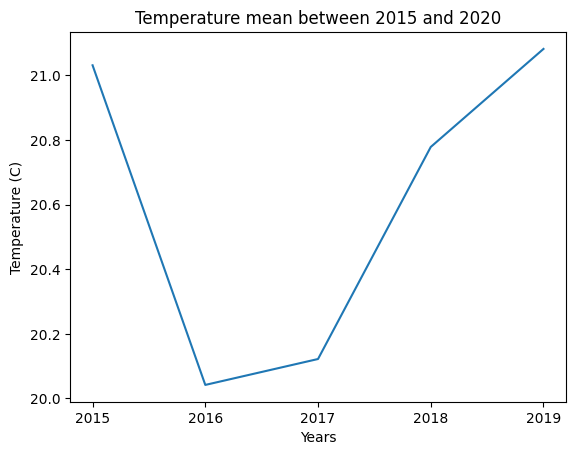

In [ ]:
plt.plot(yearsAxis, meanList)
plt.title(f'Temperature mean between {start} and {end}')
plt.xticks(yearsAxis)
plt.xlabel('Years')
plt.ylabel('Temperature (C)')
plt.show()

# Creating a dataset with 20 years of hourly collected data

In [ ]:
# Range a ser requisitado
start = 2001
end = 2024

# Outras infos
latitude = -23.51
longitude = -47.45
community = 'sb'

In [ ]:
parameters = [
    'TS',
    'CLRSKY_SFC_PAR_TOT',
    'CLRSKY_SFC_SW_DWN',
    'AOD_55',
    'AOD_84',
    'ALLSKY_SFC_PAR_TOT',
    'CLRSKY_NKT',
    'PRECTOTCORR',
]

print(len(parameters))

parameters_subset = ','.join(parameters[:])

10


In [ ]:
urls = getDataFromNasa(start, end, latitude, longitude, community, parameters_subset)
dataset = transformDataToDF(urls)

In [ ]:
dataset.describe()

,YEAR,MO,DY,HR,TS,PW,CLRSKY_SFC_PAR_TOT,WS50M,CLRSKY_SFC_SW_DWN,AOD_55,AOD_84,ALLSKY_SFC_PAR_TOT,CLRSKY_NKT,PRECTOTCORR
count,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000
mean,2012.000000,6.523333,15.728452,11.500000,20.613984,2.703156,120.790102,4.638976,268.319209,0.299641,0.196273,92.738518,-481.627072,0.145719
std,6.632728,3.448601,8.799613,6.922204,6.413503,1.027038,157.783066,1.918196,348.346975,0.228795,0.147825,128.803828,499.557311,0.409027
min,2001.000000,1.000000,1.000000,0.000000,-1.290000,0.280000,0.000000,0.010000,0.000000,0.020000,0.010000,0.000000,-999.000000,0.000000
25%,2006.000000,4.000000,8.000000,5.750000,15.970000,1.870000,0.000000,3.270000,0.000000,0.150000,0.100000,0.000000,-999.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,19.990000,2.670000,4.465000,4.680000,11.000000,0.240000,0.160000,3.500000,0.570000,0.010000
75%,2018.000000,10.000000,23.000000,17.250000,25.050000,3.520000,254.920000,5.950000,569.580000,0.380000,0.250000,177.500000,0.740000,0.090000
max,2023.000000,12.000000,31.000000,23.000000,44.880000,5.430000,502.230000,16.170000,1129.800000,5.810000,3.000000,499.880000,0.950000,15.380000


In [ ]:
dataset.to_csv(f'dataset{start}_{end}.csv', index = False, header = True, encoding='latin-1', sep=';')

In [ ]:
dataset

,YEAR,MO,DY,HR,TS,PW,CLRSKY_SFC_PAR_TOT,WS50M,CLRSKY_SFC_SW_DWN,AOD_55,AOD_84,ALLSKY_SFC_PAR_TOT,CLRSKY_NKT,PRECTOTCORR
0,2001,1,1,0,18.66,2.72,0.00,6.24,0.00,0.31,0.20,0.00,-999.00,0.02
1,2001,1,1,1,18.26,2.66,0.00,6.18,0.00,0.32,0.20,0.00,-999.00,0.02
2,2001,1,1,2,17.93,2.61,0.00,6.08,0.00,0.37,0.23,0.00,-999.00,0.02
3,2001,1,1,3,17.63,2.55,0.00,5.89,0.00,0.38,0.24,0.00,-999.00,0.02
4,2001,1,1,4,17.38,2.50,0.00,5.62,0.00,0.41,0.27,0.00,-999.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023,12,31,19,29.65,2.72,224.25,6.44,494.98,0.27,0.17,191.52,0.74,0.01
8756,2023,12,31,20,26.40,2.70,113.95,7.36,255.77,0.27,0.17,98.62,0.71,0.01
8757,2023,12,31,21,23.53,2.70,21.48,7.88,50.48,0.26,0.16,19.33,0.66,0.01
8758,2023,12,31,22,21.71,2.71,0.00,7.41,0.00,0.26,0.17,0.00,-999.00,0.01


In [ ]:
#meanList = getTempMean(start, end)
#meanList

KeyError: 'T2M'

In [ ]:
yearsAxis = np.arange(start, end)

plt.plot(yearsAxis, meanList)
plt.title(f'Temperature mean between {start} and {end}')
plt.xticks(yearsAxis, rotation = 75)
plt.scatter(yearsAxis, meanList, marker='X')
plt.xlabel('Years')
plt.ylabel('Temperature (C)')
plt.show()